## Vector-valued function with Random Fourier Features

### Imports

In [1]:
import numpy as np
from numpy.random import randn
import matplotlib.pyplot as plt
import time
from functools import wraps

### Runtime

In [2]:
def runtime(func):
    @wraps(func)
    def runtime_wrapper(*args, **kwargs):
        start_time = time.perf_counter()
        result = func(*args, **kwargs)
        end_time = time.perf_counter()
        total_time = end_time - start_time
        print("\n", f'Function {func.__name__} took {total_time:.4f} seconds')
        return result
    return runtime_wrapper

### Values

In [3]:
dimension = 2
sigma = 10
sigma2 = 2*sigma**2

# Random Fourier features
m = 20 # number of samples
w = np.array([randn(m) / sigma, randn(m) / sigma]) # w is the same size as the dimensions times the number of samples
b = np.random.rand(m)*2*np.pi # b is the same size as number of samples

n = 500 # number of points

x1 = randn(n)/2
x2 =  randn(n)/2
x_vector = np.array([x1, x2])
# x_vector = np.block([x1,x2])


noise = randn(n) * 1e-1
#y1 = np.cos(x1) + noise
#y2 = np.sin(x2) + noise

y1 = 1+np.sin(x1/10) + x1**2 + noise
y2 = 0.5 * x2**2 + np.exp(x2) + noise

y = np.array(np.ravel([y1, y2], 'F'))

lam = 0.000001 # Regularization parameter
y.shape

(1000,)

### Gaussian Kernel

In [4]:
def k_gauss(x, z):
    k = np.exp(-((np.linalg.norm(x-z))**2)/(2*sigma**2))
    return k

def k_matrix(x, z, dim):
    k = k_gauss(x, z)
    k_matrix = k *np.eye(dim)
    return k_matrix

@runtime
def K_gauss(x, n, dim):
    K = np.zeros((dim*n, dim*n))
    for i in range(0, n):
        for j in range(0, n):
            k = k_gauss(x[:,i], x[:,j])
            K[i*dim][j*dim] = k
            K[i*dim+1][j*dim+1] = k
    return K

K = K_gauss(x_vector, n, dimension)



 Function K_gauss took 1.6252 seconds


#### Alpha

In [5]:
# Returns a vector with length dim * n
@runtime
def alpha(x, y, lam, n, dim):
    K = K_gauss(x, n, dim)
    alpha_vector = np.linalg.inv((K + lam*np.eye(dim*n))) @ y
    alpha_reshape = [alpha_vector[::2], alpha_vector[1::2]]
    return np.array(alpha_reshape)

alpha_ = alpha(x_vector, y, lam, n, dimension)



 Function K_gauss took 1.4909 seconds

 Function alpha took 1.6542 seconds


#### Estimated function

In [6]:
@runtime
def estimated_function(alpha, x, n, dim):
    function = np.zeros((2, n))
    for i in range(n):
        sum = np.zeros((2))
        x_i = x[:, i]
        for j in range(n):
            k = k_gauss(x_i, x[:, j])
            print(x[:,j])
            kernel = k*np.eye(dim)
            sum = sum + kernel@alpha[:, j]
        function[:, i] = sum 
    return function

func = estimated_function(alpha_, x_vector, n, dimension)
func

[0.32312405 0.3841372 ]
[0.56917527 0.39512122]
[0.70267607 0.15648348]
[0.97668629 0.33440638]
[ 0.12194882 -0.08949907]
[-0.472566   -0.30559792]
[0.84677455 1.14303711]
[-0.35821435  0.1223507 ]
[ 1.03879710e+00 -1.96302441e-04]
[ 0.07252591 -0.04158385]
[ 0.56232338 -0.46202831]
[-0.55388675  0.06722879]
[ 0.77859317 -0.05508916]
[-0.18051217 -0.09495711]
[-1.55805213 -0.17157404]
[0.70765182 0.24396118]
[ 0.37349537 -0.31260355]
[ 0.68989927 -0.49689386]
[-0.17575977  0.18512352]
[0.24747862 0.4690986 ]
[-0.47025722 -0.01785172]
[-0.01273602  0.33568198]
[0.52770878 0.20470753]
[-0.50257045 -0.97701968]
[ 0.20140103 -0.34582764]
[-0.18795094  0.81393756]
[0.65983089 0.08606069]
[0.01577915 0.06363531]
[0.32020665 0.24177416]
[-0.98926489  0.90822256]
[-0.32919444  0.09864717]
[-0.0945072   0.96939002]
[-0.14558828 -0.89671044]
[-0.10612516 -0.12381295]
[-0.0989865   0.05065194]
[ 0.78424629 -0.12036779]
[-0.44137954  0.29713279]
[-0.78761253 -0.46274853]
[0.02929062 0.04578376]
[ 

array([[1.14053782, 1.38385815, 1.56856019, 2.04685894, 1.03054601,
        1.18309296, 1.81916314, 1.09031813, 2.19213828, 1.01533568,
        1.3868798 , 1.24861751, 1.69453386, 1.01664393, 3.27480412,
        1.57439695, 1.18491839, 1.56486873, 1.01239526, 1.09044299,
        1.17446965, 0.99959523, 1.33531878, 1.20263011, 1.06599202,
        1.02021826, 1.50735524, 1.00359024, 1.13796104, 1.80642158,
        1.07402701, 1.01478072, 0.9996034 , 1.00316165, 1.00091547,
        1.70613524, 1.14327129, 1.56076   , 1.00576076, 1.0928568 ,
        0.99799201, 1.18471037, 1.14172522, 1.06733274, 1.00094462,
        1.38203403, 0.99820693, 1.78192181, 1.00176067, 1.00099237,
        1.45816775, 1.03175033, 1.27066795, 1.00616856, 1.92626622,
        1.05461036, 1.07427028, 2.46176964, 1.3592653 , 1.00602236,
        1.26335772, 1.83392288, 1.06330506, 1.39496218, 1.04739556,
        1.23845758, 1.71851564, 1.05339458, 2.41759392, 1.37799639,
        1.25658315, 1.04680812, 1.16891084, 1.02

#### Plot

C:\Users\Heli\AppData\Local\Temp\ipykernel_23780\2062984262.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()
C:\Users\Heli\AppData\Local\Temp\ipykernel_23780\2062984262.py:23: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  g.show()


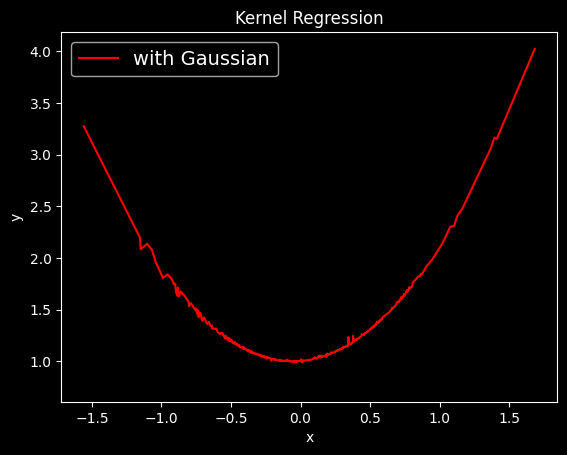

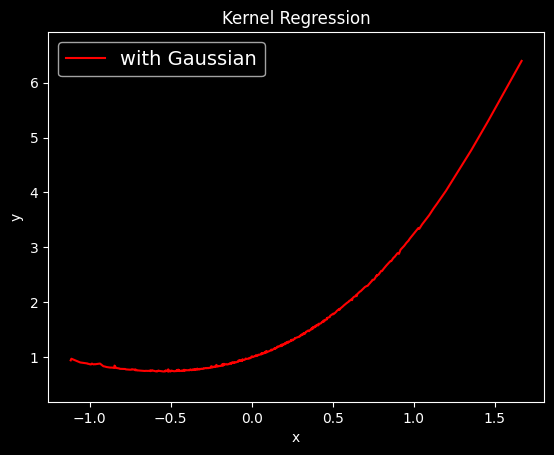

In [7]:
# Plot for x1 and y1
f1_sort = np.array([x for _,x in sorted(zip(x1,func[0]))])

f = plt.figure(1)
plt.scatter(x1,y1, facecolors ='none' , edgecolors = "k" , marker = "o")
plt.plot(np.sort(x1), f1_sort, c="r", label="with Gaussian")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Kernel Regression")
plt.legend( loc = "upper left" , frameon = True , prop ={'size': 14 } )
f.show()

# Plot for x2 and y2
f2_sort = np.array([x for _,x in sorted(zip(x2,func[1]))])

g = plt.figure(2)
plt.scatter(x2,y2, facecolors ='none' , edgecolors = "k" , marker = "o")
plt.plot(np.sort(x2), f2_sort, c="r", label="with Gaussian")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Kernel Regression")
plt.legend( loc = "upper left" , frameon = True , prop ={'size': 14 } )
g.show()

### With Random Fourier Features

#### Psi

In [8]:
def psi(x, w, b):
    return np.sqrt(2) * np.cos(w.T@x + b)

def psi_vector(x, w, b, m):
    psi_vector = np.zeros(m)
    for i in range(m):
        psi_vector[i] = psi(x, w[:, i], b[i])
    return np.array(psi_vector)

def capital_psi(x, w, b, m, dim):
    psi = psi_vector(x,w,b,m)
    return np.kron(psi, np.eye(dim))

capital_psi(x_vector[:, 1], w, b, m, dimension)

array([[-0.47471681, -0.        , -0.65162622, -0.        , -1.39947212,
        -0.        , -0.99226186, -0.        , -0.80843244, -0.        ,
         0.93498168,  0.        ,  0.75773413,  0.        ,  0.48612904,
         0.        , -0.98526269, -0.        , -1.37625828, -0.        ,
        -1.34395375, -0.        ,  0.29050853,  0.        , -1.32033555,
        -0.        , -0.0108277 , -0.        ,  1.29805198,  0.        ,
         0.13602212,  0.        , -0.71795028, -0.        , -0.35243974,
        -0.        , -1.31696911, -0.        , -0.95167191, -0.        ],
       [-0.        , -0.47471681, -0.        , -0.65162622, -0.        ,
        -1.39947212, -0.        , -0.99226186, -0.        , -0.80843244,
         0.        ,  0.93498168,  0.        ,  0.75773413,  0.        ,
         0.48612904, -0.        , -0.98526269, -0.        , -1.37625828,
        -0.        , -1.34395375,  0.        ,  0.29050853, -0.        ,
        -1.32033555, -0.        , -0.0108277 ,  0.

#### Phi

In [9]:
def phi(x, w, b, n, m, dim):
    phi = np.zeros((dim*n, dim*m))
    for i in range(0, n):
        psi = capital_psi(x[:,i], w, b, m, dim)
        phi[dim*i] = psi[0]
        phi[dim*i+1] = psi[1]
    return phi

phi_ = phi(x_vector, w, b, n, m, dimension)

#### Alpha

In [20]:
def alpha_approx(x_vector, y, dim, m, lam, n):
    print(x_vector.shape, y.shape, dim, m, n)
    phi_ = phi(x_vector, w, b, n, m, dimension)
    alpha = np.linalg.inv(phi_.T @ phi_ + lam*np.eye(dim*m)) @ (phi_.T@y)

    return alpha

alpha_approximation = alpha_approx(x_vector, y, dimension, m, lam, n)
alpha_approximation
alpha_approximation.shape

(2, 500) (1000,) 2 20 500


(40,)

#### Function Approximation

In [11]:
@runtime
def function_approximation(alpha, x, n, dim):
    f = np.zeros((dim, n))
    for i in range(n):
        f[:, i] = capital_psi(x[:, i], w, b, m, dim) @ alpha
    return f

# Evt: Gir samme resultat
def func_2(alpha, phi):
    func = phi @ alpha
    return np.array([func[::2], func[1::2]])

function_estimate = function_approximation(alpha_approximation, x_vector, n, dimension)



 Function function_approximation took 0.1025 seconds


#### Plot

C:\Users\Heli\AppData\Local\Temp\ipykernel_23780\2458617684.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()
C:\Users\Heli\AppData\Local\Temp\ipykernel_23780\2458617684.py:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  g.show()


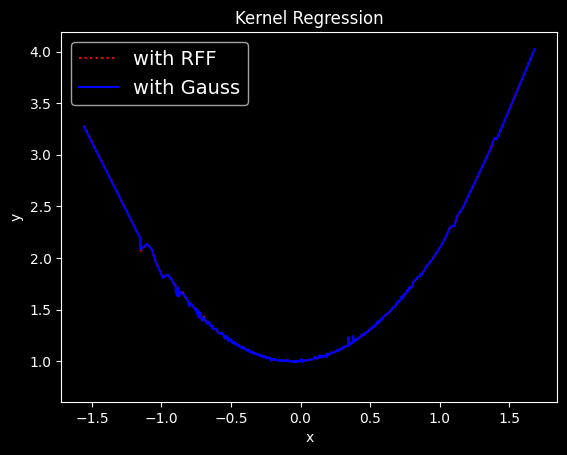

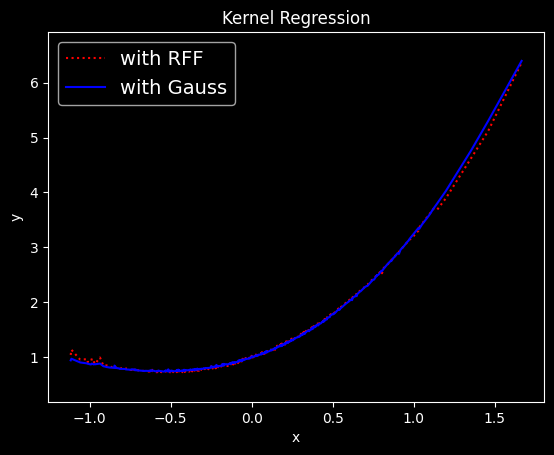

In [12]:
# Plot for x1 and y1
f1_sort_approx = np.array([x for _,x in sorted(zip(x1,function_estimate[0]))])

f = plt.figure(1)
plt.scatter(x1,y1, facecolors ='none' , edgecolors = "k" , marker = "o")
plt.plot(np.sort(x1), f1_sort_approx, c="r", label="with RFF", ls = ":")
plt.plot(np.sort(x1), f1_sort, c="b", label="with Gauss")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Kernel Regression")
plt.legend( loc = "upper left" , frameon = True , prop ={'size': 14 } )
f.show()

# Plot for x2 and y2
f2_sort_approx = np.array([x for _,x in sorted(zip(x2,function_estimate[1]))])

g = plt.figure(2)
plt.scatter(x2,y2, facecolors ='none' , edgecolors = "k" , marker = "o")
plt.plot(np.sort(x2), f2_sort_approx, c="r", label="with RFF", ls = ":")
plt.plot(np.sort(x2), f2_sort, c="b", label="with Gauss")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Kernel Regression")
plt.legend( loc = "upper left" , frameon = True , prop ={'size': 14 } )
g.show()